In [1]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
cats = ['alt.atheism', 'sci.space']
data_frame = fetch_20newsgroups(subset='train', shuffle=True, categories=cats)
sentences=data_frame.data
y=data_frame.target

In [4]:
from sklearn import preprocessing

In [5]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)


In [6]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

In [7]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

In [8]:
max_review_len = max([len(s.split()) for s in sentences])
print("max_review_len",max_review_len)
vocab_size = len(tokenizer.word_index)+1
print("vocab_size",vocab_size)
sentencesPre = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
max_review_len

max_review_len 8648
vocab_size 22976


8648

In [9]:
from keras.layers import Embedding, Flatten

In [10]:
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_review_len))
model.add(Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history1=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
4/4 [==============================] - 6s 1s/step - loss: 5.4495 - acc: 0.5050 - val_loss: 7.6765 - val_acc: 0.5911
Epoch 2/5
4/4 [==============================] - 6s 1s/step - loss: 7.6720 - acc: 0.5398 - val_loss: 7.6765 - val_acc: 0.5911
Epoch 3/5
4/4 [==============================] - 6s 1s/step - loss: 7.6720 - acc: 0.5398 - val_loss: 7.6765 - val_acc: 0.5911
Epoch 4/5
4/4 [==============================] - 6s 1s/step - loss: 7.6720 - acc: 0.5398 - val_loss: 7.6765 - val_acc: 0.5911
Epoch 5/5
4/4 [==============================] - 5s 1s/step - loss: 7.6720 - acc: 0.5398 - val_loss: 7.6765 - val_acc: 0.5911


In [11]:
print(history1.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [12]:
import matplotlib.pyplot as plt

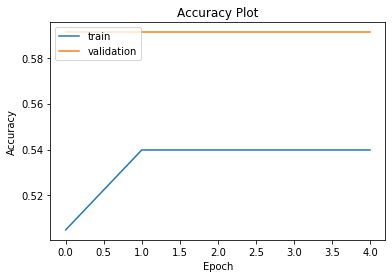

In [13]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

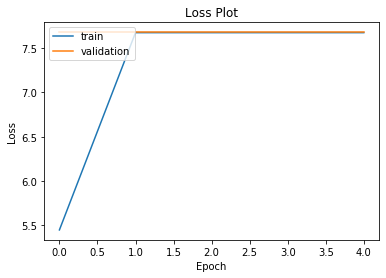

In [14]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
print("Actual Prediction",y_test[8],"Predicted Prediction",model.predict_classes(X_test[[8],:]))

Actual Prediction 1 Predicted Prediction [1]
